In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
SZ = (1280, 1918)

In [4]:
path = Path('data').absolute()
path.ls(), (path/'train').ls()

([PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/test'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train_masks.zip'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/sample_submission.csv'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/29bb3ece3180_11.jpg'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/metadata.csv'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train.zip'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/carvana-image-masking-challenge.zip'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/test.zip')],
 [PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/train_masks.csv'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/original'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/tiny'),
  PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/train

In [5]:
path_img = path/'train/tiny'
path_lbl = path/'train/train_masks.csv'

In [6]:
fnames = path_img.ls()
fnames[:3]

[PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/tiny/fc5f1a3a66cf_12.jpg'),
 PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/tiny/99639c826ea5_15.jpg'),
 PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/tiny/f8b6f4c39204_15.jpg')]

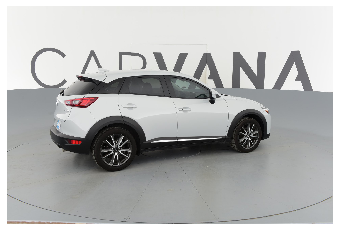

In [7]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(6, 4))

In [8]:
df_lbl = pd.read_csv(path_lbl)
df_lbl.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


In [9]:
name2label = {o['img']: o['rle_mask'] for _, o in df_lbl.iterrows()}

In [28]:
from tqdm import tqdm

In [29]:
save_dir = Path(path/'train/labels')
save_dir.mkdir(exist_ok=True)
for _, (fname, rle) in tqdm(df_lbl.iterrows()):
    arr = rle_decode(rle, shape=(1280, 1918))
    plt.imsave(save_dir/fname, arr)

5088it [13:36,  6.23it/s]


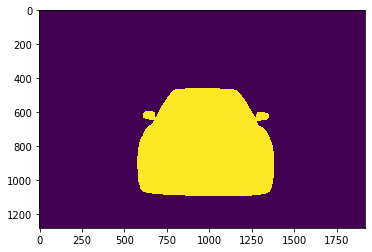

In [19]:
arr = rle_decode(rle_mask, shape=(1280, 1918))
plt.imshow(arr)

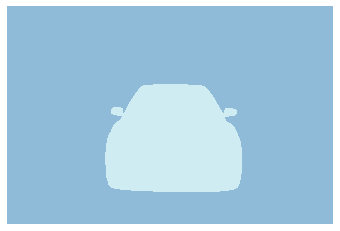

In [14]:
rle_mask = df_lbl['rle_mask'][0]
mask = open_mask_rle(rle_mask, shape=(1918, 1280))
mask.show(figsize=(6, 4))

In [37]:
get_y_fn = lambda x: open_mask_rle(name2label[x.name], shape=(1918, 1280))

In [11]:
def get_y_fn(x):
    import pdb; pdb.set_trace()

In [12]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.2, seed=42)
       .label_from_func(get_y_fn, classes=['car']))

--Return--
> <ipython-input-11-0c112ce69b54>(2)get_y_fn()->None
-> import pdb; pdb.set_trace()
(Pdb) x
PosixPath('/home/lgvaz/projects/vision/carvana-cars/data/train/tiny/99639c826ea5_15.jpg')
(Pdb) x.name
'99639c826ea5_15.jpg'
(Pdb) name2label(x.name)
*** TypeError: 'dict' object is not callable
(Pdb) name2label[x.name]
'664443 4 666326 72 668227 103 670132 59 670208 50 672040 48 672154 31 673948 58 674086 24 675723 216 676015 20 677586 286 677941 17 679478 322 679867 15 681377 352 681791 14 683281 374 683715 14 685188 392 685637 15 687098 403 687557 19 689009 490 690921 502 691425 115 692834 637 694747 649 695482 5 696661 658 697400 6 698575 666 699318 7 700489 673 701235 9 702404 679 703154 9 704318 685 705072 9 706233 690 706990 10 708148 694 708908 11 710063 699 710826 11 711978 709 712744 12 713894 719 714662 12 715809 731 716580 13 717725 742 718494 17 719641 753 720405 25 721557 791 723474 793 725390 795 727307 797 729223 799 731140 801 733057 802 734973 805 736890 807 738807 8

(Pdb) open_mask_rle(name2label[x.name], shape=(1918, 1280))
ImageSegment (1, 1280, 1918)
(Pdb) exit


BdbQuit: 

In [39]:
bs = 1
data = (src
        .transform(get_transforms(), size=SZ, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

AttributeError: 'ImageSegment' object has no attribute 'read'